In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

2024-02-08 04:00:00.656975: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 04:00:01.146073: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-08 04:00:01.148734: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-08 04:00:03.181320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
data = pd.read_csv('data/GOOG.csv')

# Calculate historical volatility
data['Returns'] = data['Adj Close'].pct_change()
data['Volatility'] = data['Returns'].rolling(window=5).std() 
data = data.dropna()

In [3]:
scaler = StandardScaler()



In [9]:
x_train,x_test,y_train, y_test = train_test_split(data['Close'],data['Volatility'],test_size=0.3, shuffle=False)

x_train = scaler.fit_transform(pd.DataFrame(x_train))
x_test = scaler.fit_transform(pd.DataFrame(x_test))

In [10]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

In [12]:
rf_prediction = rf_model.predict(x_test)

In [13]:
rf_rmse = np.sqrt(mean_squared_error(y_test,rf_prediction))
print(f"RMSE: {rf_rmse}")

RMSE: 0.013533640191556227


In [17]:
rf_prediction.shape

(754,)

In [19]:
y_test.shape

(754,)

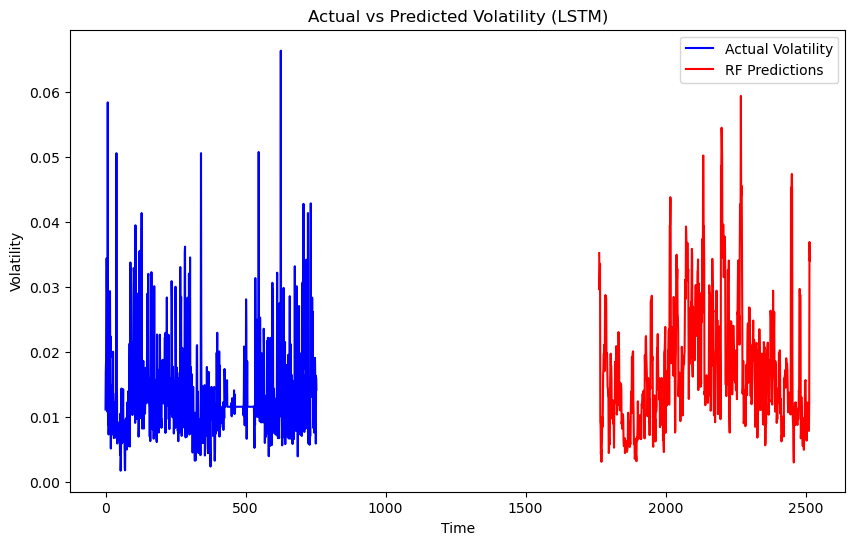

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(rf_prediction, label='Actual Volatility', color='blue')
plt.plot(y_test, label='RF Predictions', color='red')
plt.title('Actual vs Predicted Volatility (LSTM)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()